## PCNA-DNA trajectory analysis

a) Import the modules

In [1]:
from collections import OrderedDict
import itertools
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import mdtraj as md
from scipy import stats
%matplotlib inline

/home/oriol/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/oriol/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


b) Select the trajectory

### it_traj

In [55]:
name = '0_t3_208'
dirname =  '/home/oriol/calculs/test/trajectories/it_traj/'
top_file = '1t'
traj_type = "it_traj"

In [48]:
name = '1_t3_168'
dirname = '/home/oriol/calculs/test/trajectories/it_traj/'
top_file = '1t'
traj_type = "it_traj"

In [90]:
name = '1_t3b_163'
dirname = '/home/oriol/perdiux/PCNA/it_traj/1_t3b/'
top_file = '1t'
traj_type = "it_traj"

### trace

In [31]:
name = '1_t3b_181_99'
dirname =  '/home/oriol/calculs/test/trajectories/trace/'
top_file = '1t'
traj_type = "trace"

In [2]:
name = '1_t3b_181_all'
dirname =  '/home/oriol/calculs/test/trajectories/trace/'
top_file = '1t'
traj_type = "trace"

In [127]:
name = '1_t3b_163_125'
dirname =  '/home/oriol/calculs/test/trajectories/trace/'
top_file = '1t'
traj_type = "trace"

c) Load the trajectory

In [3]:
file = 'traj{}.xtc'.format(name)
pcoord_file = dirname+"pcoords{}.dat".format(name)
traj = md.load(dirname+file, top='/home/oriol/calculs/test/WESTPA/gromacs_config/frame{}_Protein_DNA.pdb'.format(top_file))
pcoords = []
my_file = open(pcoord_file, 'r')
m = my_file.readline()
while m:
    pcoords.append(float(m.split("\t")[1][:-1]))
    m = my_file.readline()
if traj_type == "it_traj":
    traj = traj[np.argsort(pcoords)]
    pcoords.sort()
top = traj.topology
print(name, traj)

1_t3b_181_all <mdtraj.Trajectory with 362 frames, 15139 atoms, 897 residues, and unitcells>


d) Select atoms of DNA and PCNA to measure the distances

In [4]:
dnaP = top.select('type P')

resi = OrderedDict()

resname = 'S10'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 10 and chainid 0 and name OG')
resi[resname]['B'] = top.select('residue 10 and chainid 1 and name OG')
resi[resname]['C'] = top.select('residue 10 and chainid 2 and name OG')

resname = 'K14'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 14 and chainid 0 and name NZ')
resi[resname]['B'] = top.select('residue 14 and chainid 1 and name NZ')
resi[resname]['C'] = top.select('residue 14 and chainid 2 and name NZ')

resname = 'K20'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 20 and chainid 0 and name NZ')
resi[resname]['B'] = top.select('residue 20 and chainid 1 and name NZ')
resi[resname]['C'] = top.select('residue 20 and chainid 2 and name NZ')

resname = 'K77'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 77 and chainid 0 and name NZ')
resi[resname]['B'] = top.select('residue 77 and chainid 1 and name NZ')
resi[resname]['C'] = top.select('residue 77 and chainid 2 and name NZ')

resname = 'K80'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 80 and chainid 0 and name NZ')
resi[resname]['B'] = top.select('residue 80 and chainid 1 and name NZ')
resi[resname]['C'] = top.select('residue 80 and chainid 2 and name NZ')

resname = 'N84'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 84 and chainid 0 and name ND2')
resi[resname]['B'] = top.select('residue 84 and chainid 1 and name ND2')
resi[resname]['C'] = top.select('residue 84 and chainid 2 and name ND2')

resname = 'R149'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 149 and chainid 0 and (name NH1 or name NH2)')
resi[resname]['B'] = top.select('residue 149 and chainid 1 and (name NH1 or name NH2)')
resi[resname]['C'] = top.select('residue 149 and chainid 2 and (name NH1 or name NH2)')

resname = 'K190'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 190 and chainid 0 and name NZ')
resi[resname]['B'] = top.select('residue 190 and chainid 1 and name NZ')
resi[resname]['C'] = top.select('residue 190 and chainid 2 and name NZ')

resname = 'R210'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 210 and chainid 0 and (name NH1 or name NH2)')
resi[resname]['B'] = top.select('residue 210 and chainid 1 and (name NH1 or name NH2)')
resi[resname]['C'] = top.select('residue 210 and chainid 2 and (name NH1 or name NH2)')

resname = 'K217'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 217 and chainid 0 and name NZ')
resi[resname]['B'] = top.select('residue 217 and chainid 1 and name NZ')
resi[resname]['C'] = top.select('residue 217 and chainid 2 and name NZ')

resname = 'S223'
resi[resname] = {}
resi[resname]['A'] = top.select('residue 223 and chainid 0 and name OG')
resi[resname]['B'] = top.select('residue 223 and chainid 1 and name OG')
resi[resname]['C'] = top.select('residue 223 and chainid 2 and name OG')


e) Select atoms of p15 to measure the distances

In [5]:
resi_p = OrderedDict()

resname = 'K46'
resi_p[resname] = {}
resi_p[resname]['D'] = top.select('residue 46 and chainid 3 and name NZ')
resi_p[resname]['E'] = top.select('residue 46 and chainid 4 and name NZ')

resname = 'Y47'
resi_p[resname] = {}
resi_p[resname]['D'] = top.select('residue 47 and chainid 3 and sidechain and not type H')
resi_p[resname]['E'] = top.select('residue 47 and chainid 4 and sidechain and not type H')

resname = 'A48'
resi_p[resname] = {}
resi_p[resname]['D'] = top.select('residue 48 and chainid 3 and not type H')
resi_p[resname]['E'] = top.select('residue 48 and chainid 4 and not type H')

resname = 'G49'
resi_p[resname] = {}
resi_p[resname]['D'] = top.select('residue 49 and chainid 3 and not type H')
resi_p[resname]['E'] = top.select('residue 49 and chainid 4 and not type H')

resname = 'G50'
resi_p[resname] = {}
resi_p[resname]['D'] = top.select('residue 50 and chainid 3 and not type H')
resi_p[resname]['E'] = top.select('residue 50 and chainid 4 and not type H')

resname = 'N51'
resi_p[resname] = {}
resi_p[resname]['D'] = top.select('residue 51 and chainid 3 and name ND2')
resi_p[resname]['E'] = top.select('residue 51 and chainid 4 and name ND2')

f) Plot of the minimum distances between p15 residues and DNA phosphates

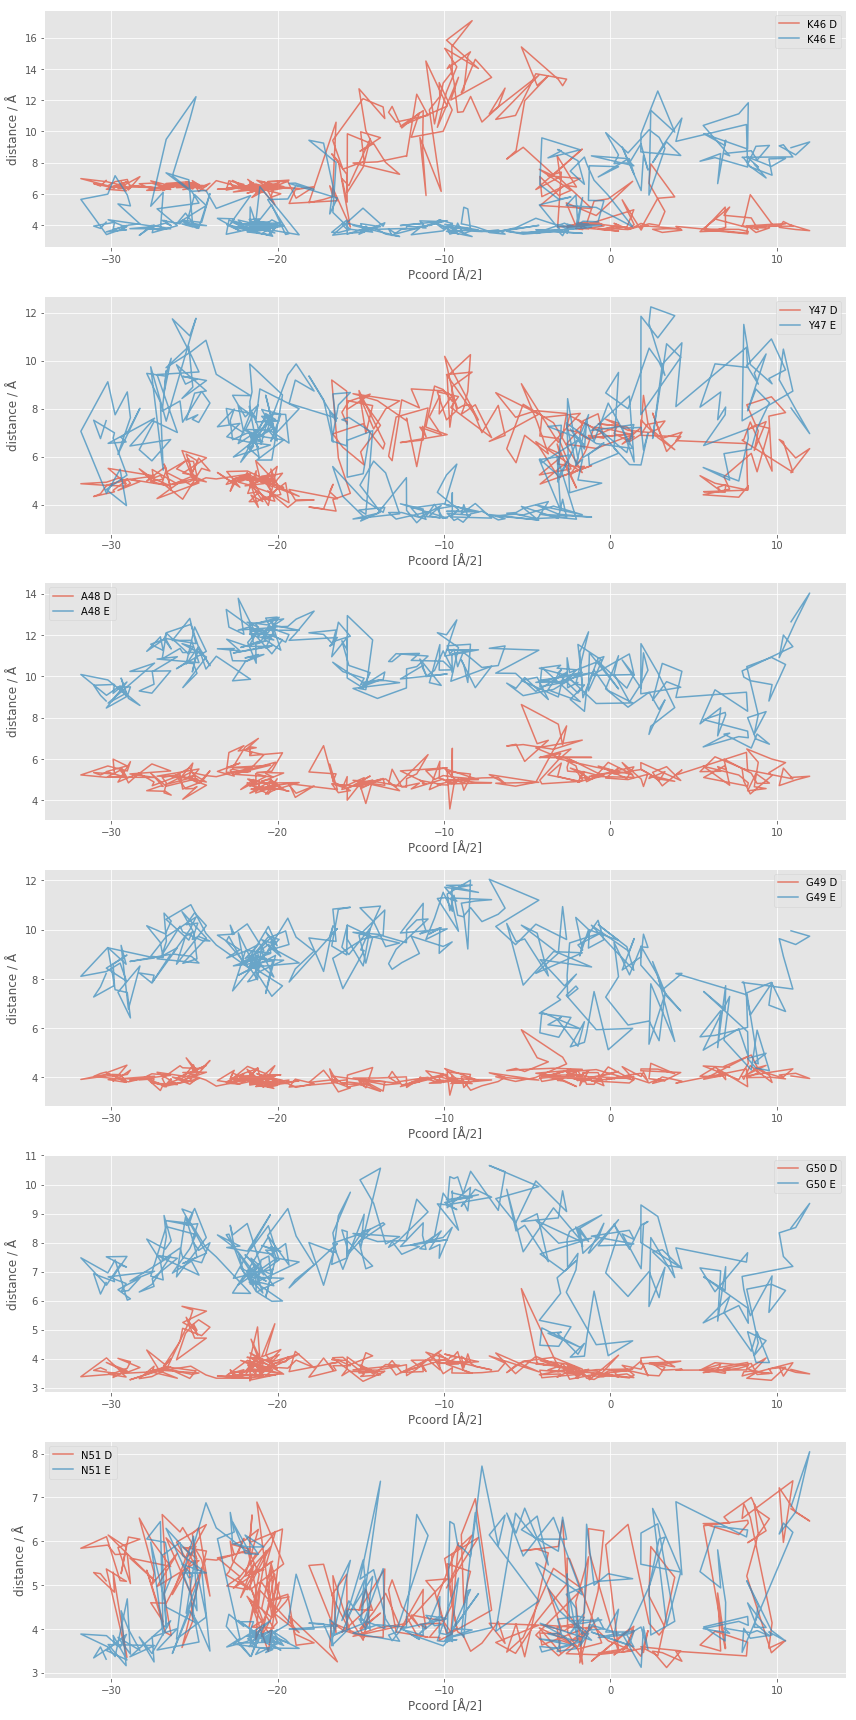

In [6]:
with plt.style.context(('ggplot')):
    fig=plt.figure(figsize=(12,4*len(resi_p)))
    for iplot,r in enumerate(resi_p):
        fig.add_subplot(len(resi_p), 1,iplot+1)
        for c in ('D', 'E'):
            pairs=np.array(list(itertools.product(resi_p[r][c],dnaP)))
            mindists= np.min(md.compute_distances(traj, pairs)*10, axis=1)
            plt.plot(pcoords, mindists, label=r+' '+c, alpha=0.7)
            plt.ylabel('distance / Å')
            plt.xlabel('Pcoord [Å/2]')
        plt.legend(loc='best')
fig.tight_layout()
fig.savefig('distance_evolution_p15-{}.png'.format(name))
plt.show()

g) Plot of the minimum distances between PCNA residues and DNA phosphates

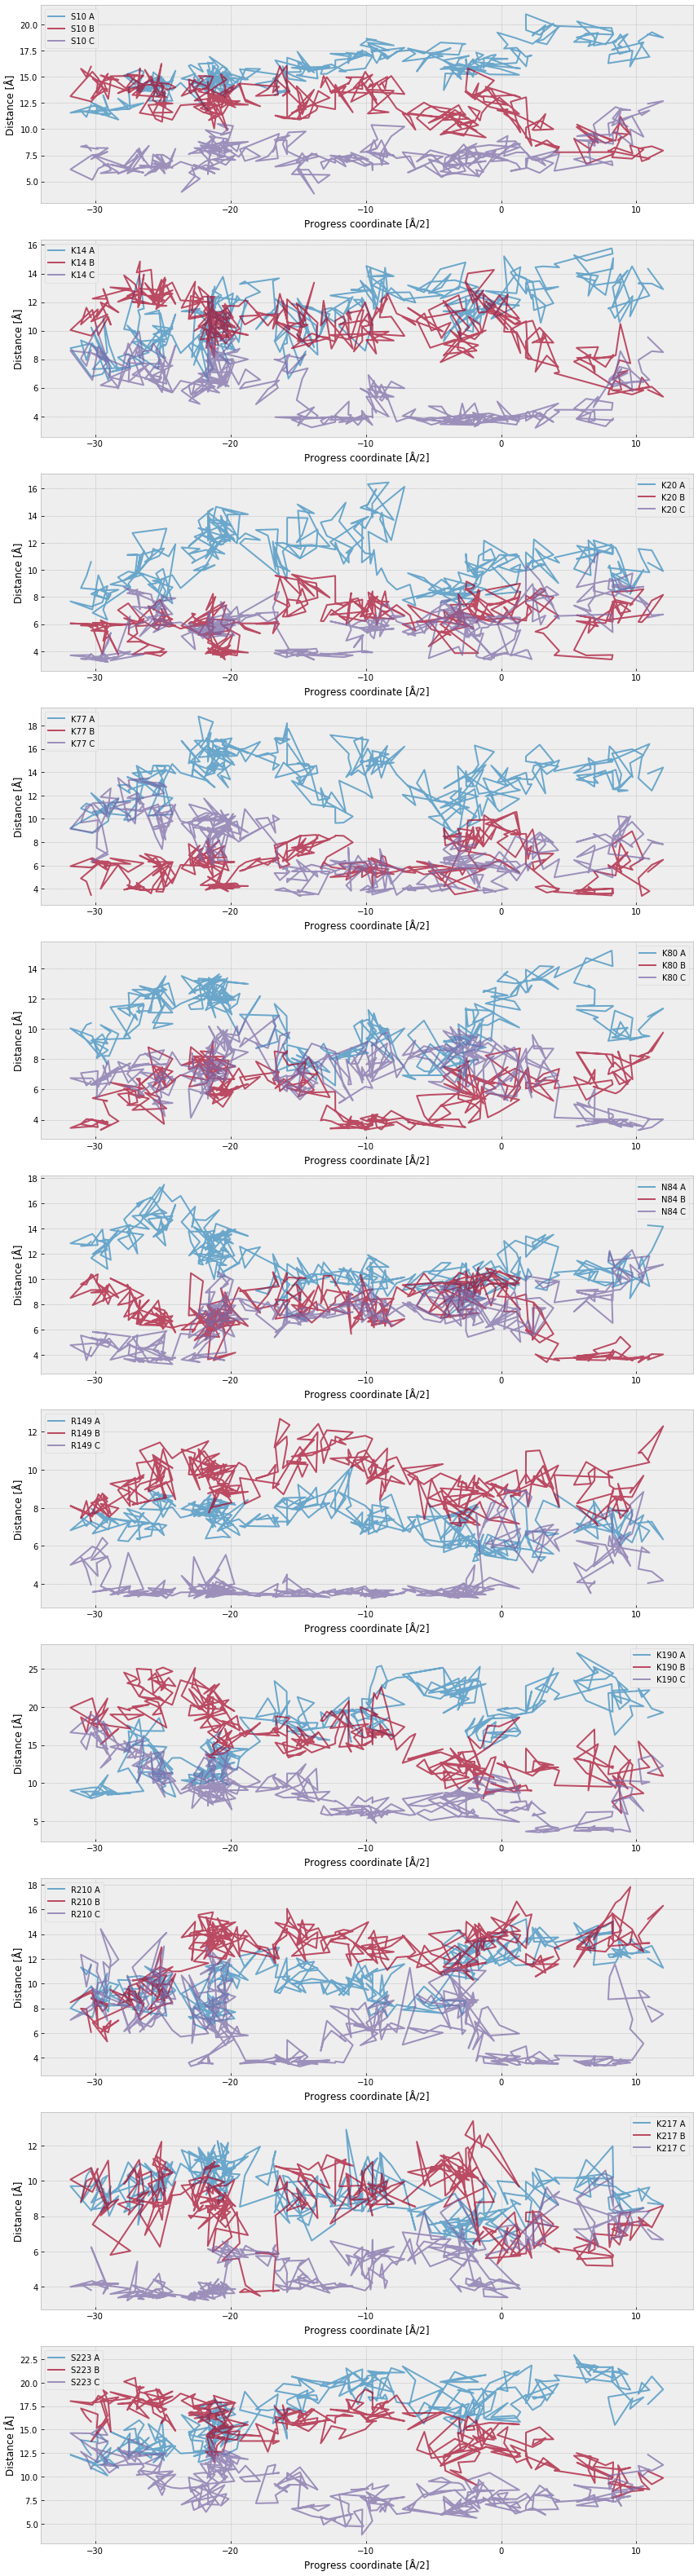

In [7]:
with plt.style.context(('bmh')):
    fig=plt.figure(figsize=(12,4*len(resi)))
    for iplot,r in enumerate(resi):
        fig.add_subplot(len(resi), 1,iplot+1)
        for c in ('A', 'B', 'C'):
            pairs=np.array(list(itertools.product(resi[r][c],dnaP)))
            mindists= np.min(md.compute_distances(traj, pairs)*10, axis=1)
            plt.plot(pcoords, mindists, label=r+' '+c, alpha=0.7)
            plt.ylabel('Distance [Å]')
            plt.xlabel('Progress coordinate [Å/2]')
        plt.legend(loc='best')
fig.tight_layout()
fig.savefig('distance_evolution-{}.png'.format(name))
plt.show()

h) Plot of the minimum distances between PCNA residues of subunit A and DNA phosphates

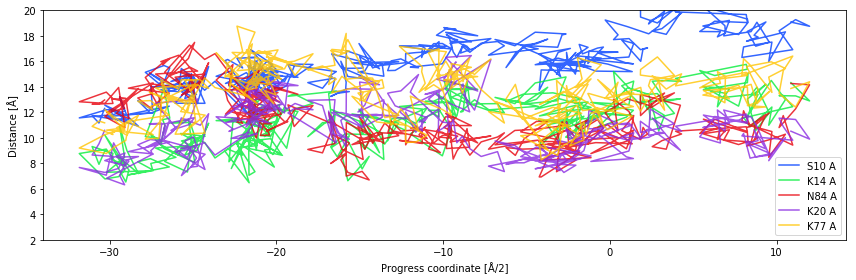

In [8]:
with plt.style.context(('seaborn-bright')):
    fig=plt.figure(figsize=(12,4))
    for r in ('S10', 'K14','N84', 'K20', 'K77'):
        for c in ('A',):
            pairs=np.array(list(itertools.product(resi[r][c],dnaP)))
            mindists= np.min(md.compute_distances(traj, pairs)*10, axis=1)
            plt.plot(pcoords,mindists, label=r+' '+c, alpha=0.8)
    plt.ylim(2,20)
    plt.ylabel('Distance [Å]')
    plt.xlabel('Progress coordinate [Å/2]')
    plt.legend(loc='best')
    fig.tight_layout()
    fig.savefig('distance_evolution-{}.png'.format(name))

i) Calculates the distribution of minimum distance between DNA phosphates and p15 residues

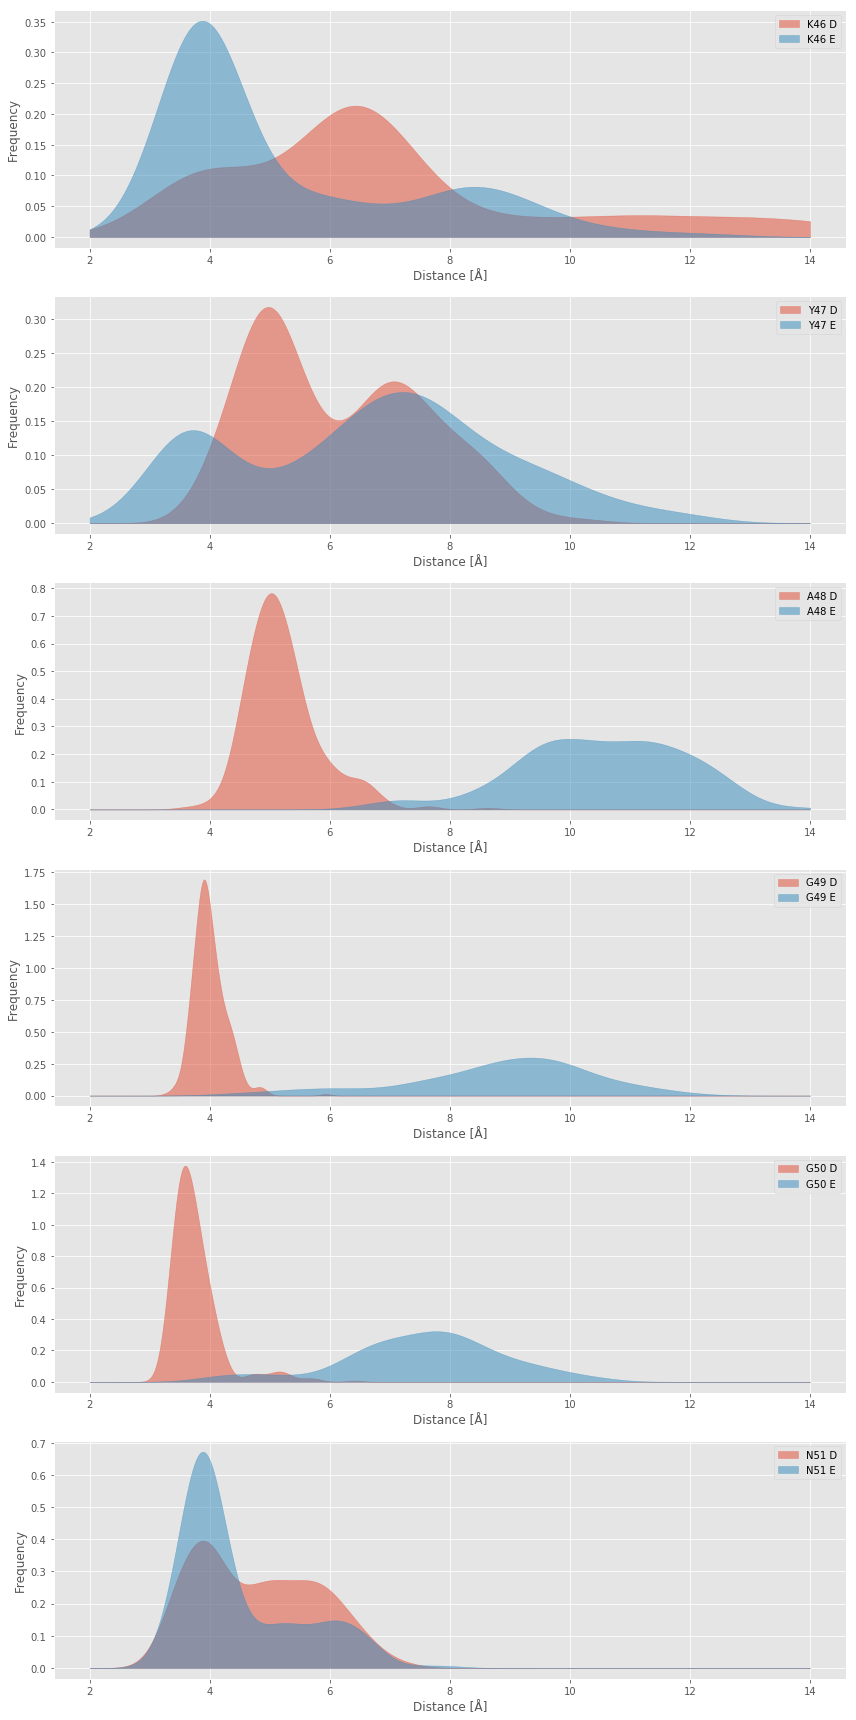

In [10]:
fig=plt.figure(figsize=(12,4*len(resi_p)))
with plt.style.context(('ggplot')):
    for iplot,r in enumerate(resi_p):
        fig.add_subplot(len(resi_p), 1,iplot+1)
        for i, c in enumerate(('D', 'E')):
            pairs=np.array(list(itertools.product(resi_p[r][c],dnaP)))
            kerneldist=stats.gaussian_kde(np.min(md.compute_distances(traj, pairs)*10, axis=1))
            plt.fill_between(np.linspace(2,14,500),kerneldist(np.linspace(2,14,500)), label=r+' '+c, alpha=0.5,
                            color=list(plt.rcParams['axes.prop_cycle'])[i]['color'])
            plt.ylabel('Frequency')
            plt.xlabel('Distance [Å]')
        plt.legend(loc='best')
fig.tight_layout()
fig.savefig('distance_distributions_p15-{}.png'.format(name))

j) Calculates the distribution of minimum distance between DNA phosphates and p15 residues

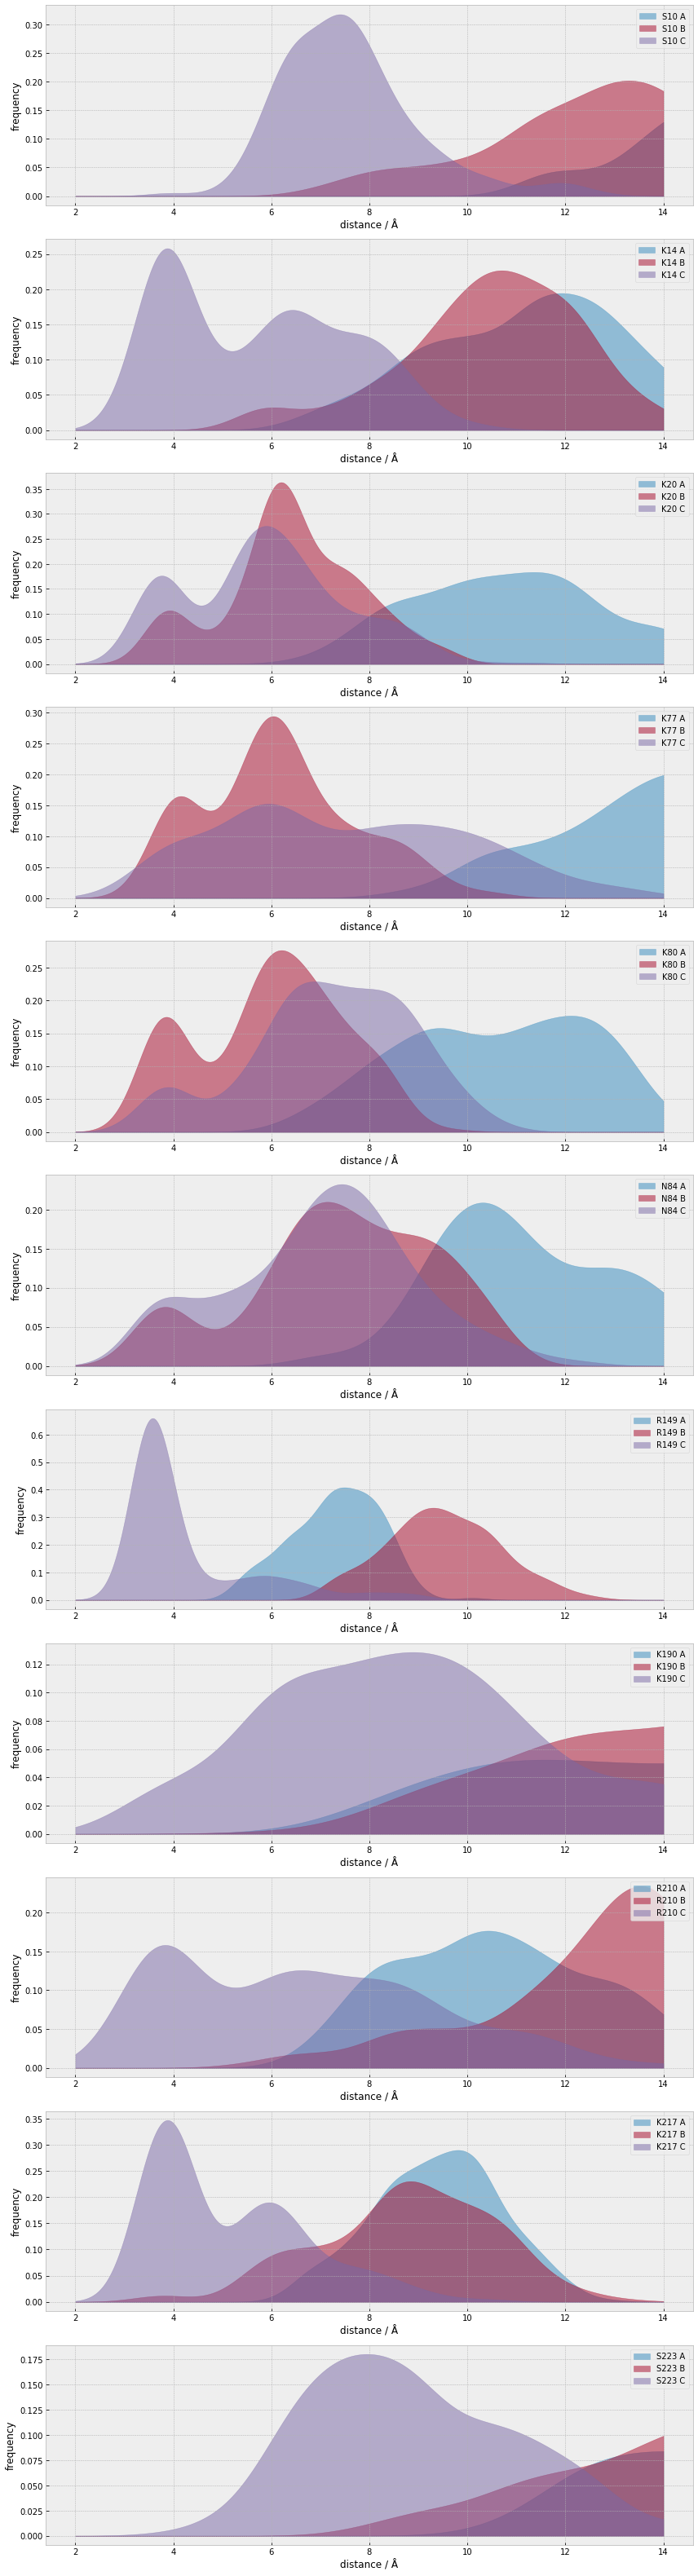

In [11]:
iniframe = 0
fig=plt.figure(figsize=(12,4*len(resi)))
with plt.style.context(('bmh')):
    for iplot,r in enumerate(resi):
        fig.add_subplot(len(resi), 1,iplot+1)
        for i, c in enumerate(('A', 'B', 'C')):
            pairs=np.array(list(itertools.product(resi[r][c],dnaP)))
            kerneldist=stats.gaussian_kde(np.min(md.compute_distances(traj[iniframe:], pairs)*10, axis=1))
            plt.fill_between(np.linspace(2,14,500),kerneldist(np.linspace(2,14,500)), label=r+' '+c, alpha=0.5,
                            color=list(plt.rcParams['axes.prop_cycle'])[i]['color'])
            plt.ylabel('Frequency')
            plt.xlabel('Distance [Å]')
            
        plt.legend(loc='best')
fig.tight_layout()
fig.savefig('distance_distributions-{}.png'.format(name))

k) Plots the contacts between DNA phosphates and p15 residues

/home/oriol/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/oriol/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater_equal


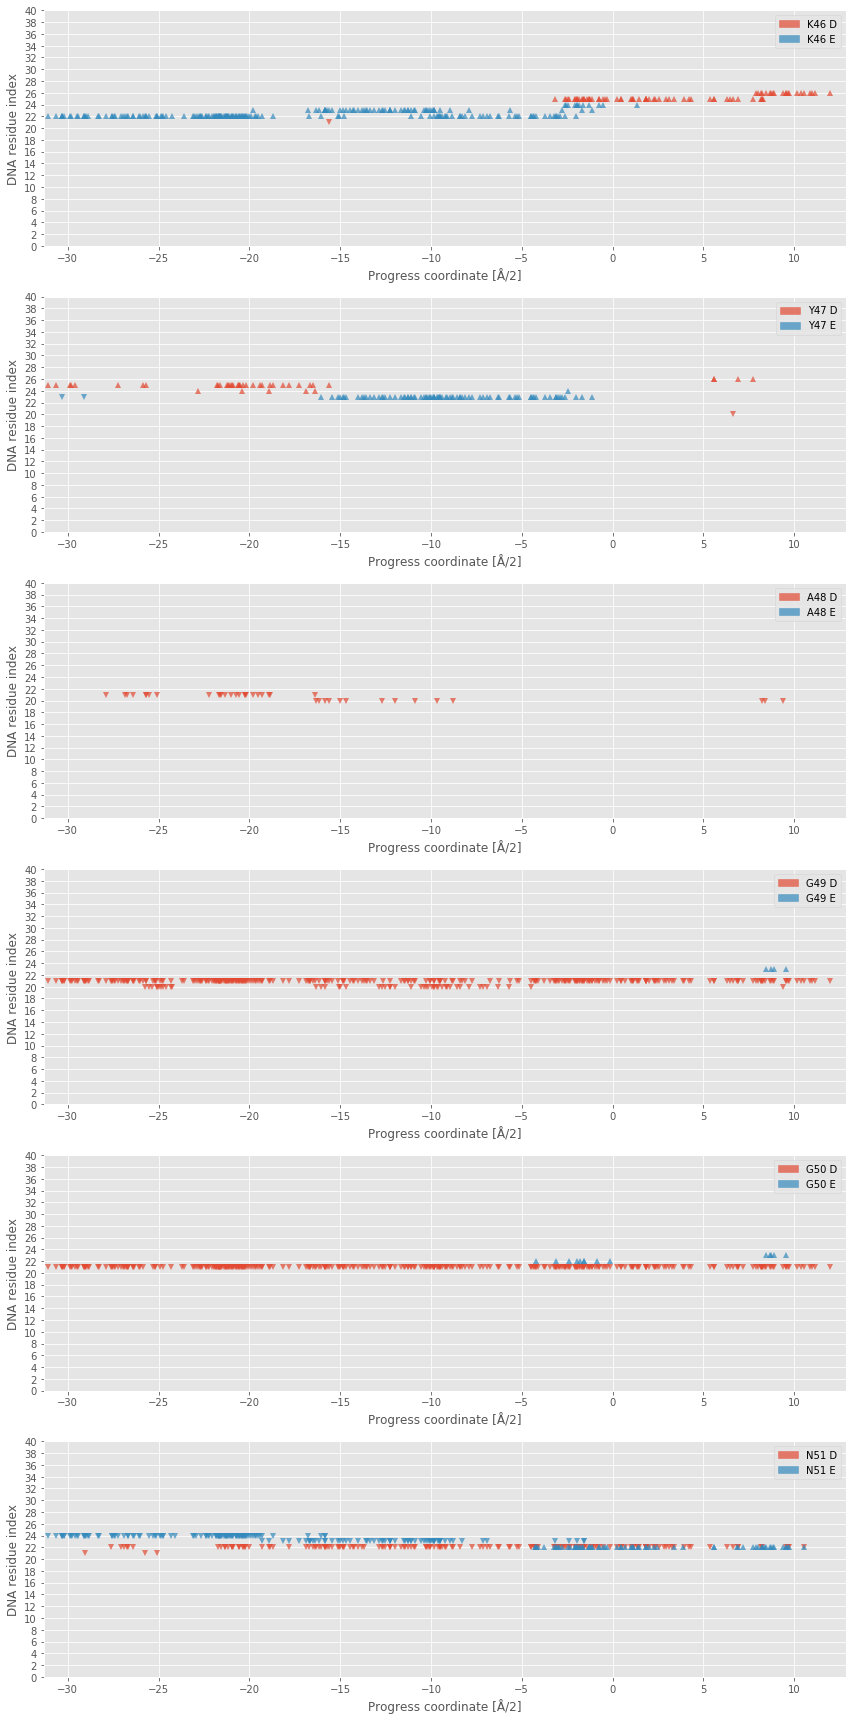

In [12]:
dist_threshold=4.6
atoms=np.array(list(top.atoms))
start_dna1 = top.chain(5).residue(0).index
start_dna2 = top.chain(6).residue(0).index
with plt.style.context(('ggplot')):
    fig=plt.figure(figsize=(12,4*len(resi_p)))
    for iplot,r in enumerate(resi_p):
        fig.add_subplot(len(resi_p), 1,iplot+1)
        legend_patches = []
        for c in ('D', 'E'):
            pairs=np.array(list(itertools.product(resi_p[r][c],dnaP)))
            p_atoms = atoms[pairs[np.argmin(md.compute_distances(traj, pairs)*10, axis=1),1]]
            p_atoms = [a.residue.index for a in p_atoms]
            within_dist = np.min(md.compute_distances(traj, pairs)*10, axis=1)<dist_threshold
            p_atoms = np.where(within_dist, p_atoms, np.nan)
            p_atoms1 = np.where(p_atoms< start_dna2, p_atoms-start_dna1+1, np.nan)
            p_atoms2 = np.where(p_atoms>= start_dna2, p_atoms-start_dna2+1, np.nan)
            base_line, = plt.plot(pcoords,p_atoms1, '^',markeredgecolor='none', alpha=0.7)
            plt.plot(pcoords,p_atoms2, 'v',markeredgecolor='none', color=base_line.get_color(), alpha=0.7)
            legend_patches.append(mpatches.Patch(color=base_line.get_color(), label=r+' '+c, alpha=0.7))
            plt.yticks(np.arange(0,start_dna2-start_dna1+1, 2))
        plt.ylabel('DNA residue index')
        plt.xlabel('Progress coordinate [Å/2]')
        plt.xlim(pcoords[0]-1,pcoords[-1]+2)
        plt.legend(handles=legend_patches,loc='best')
fig.tight_layout()
plt.savefig('index_contact_evolution-G49_rot_final_{}-{:3.1f}.png'.format(name, dist_threshold))

l) Plots the contacts between DNA phosphates and p15 residues

/home/oriol/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/oriol/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater_equal


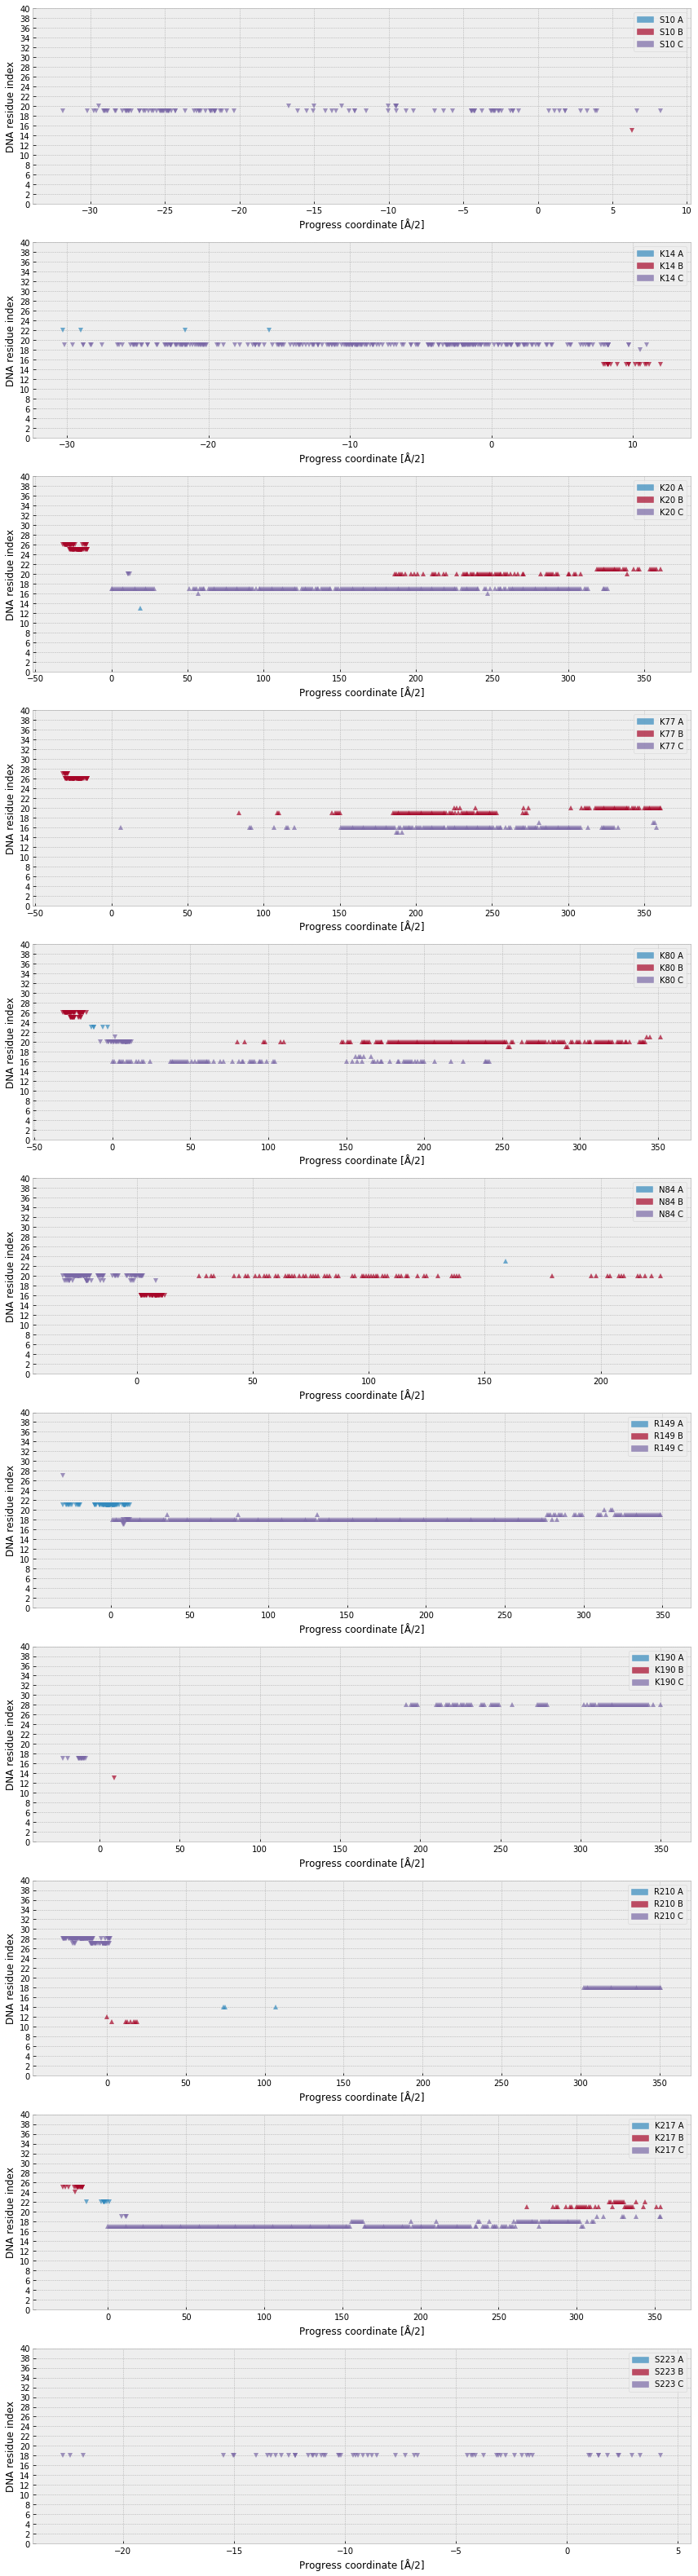

In [13]:
dist_threshold=6.8
atoms=np.array(list(top.atoms))
start_dna1 = top.chain(5).residue(0).index
start_dna2 = top.chain(6).residue(0).index
with plt.style.context(('bmh')):
    fig=plt.figure(figsize=(12,4*len(resi)))
    for iplot,r in enumerate(resi):
        fig.add_subplot(len(resi), 1,iplot+1)
        legend_patches = []
        for c in ('A', 'B', 'C'):
            pairs=np.array(list(itertools.product(resi[r][c],dnaP)))
            p_atoms = atoms[pairs[np.argmin(md.compute_distances(traj, pairs)*10, axis=1),1]]
            p_atoms = [a.residue.index for a in p_atoms]
            within_dist = np.min(md.compute_distances(traj, pairs)*10, axis=1)<dist_threshold
            p_atoms = np.where(within_dist, p_atoms, np.nan)
            p_atoms1 = np.where(p_atoms< start_dna2, p_atoms-start_dna1+1, np.nan)
            p_atoms2 = np.where(p_atoms>= start_dna2, p_atoms-start_dna2+1, np.nan)
            base_line, = plt.plot(p_atoms1, '^',markeredgecolor='none', alpha=0.7)
            plt.plot(pcoords,p_atoms2, 'v',markeredgecolor='none', color=base_line.get_color(), alpha=0.7)
            legend_patches.append(mpatches.Patch(color=base_line.get_color(), label=r+' '+c, alpha=0.7))
            plt.yticks(np.arange(0,start_dna2-start_dna1+1, 2))
        plt.ylabel('DNA residue index')
        plt.xlabel('Progress coordinate [Å/2]')
        plt.legend(handles=legend_patches,loc='best')
fig.tight_layout()
fig.savefig('index_contact_evolution-_rot_new_{}-{:3.1f}.png'.format(name, dist_threshold))